In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [5]:
# Convert data type to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize by dividing each pixel by 255 (assuming pixel values are in the range [0, 255])
X_train /= 255.0
X_test /= 255.0


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode the labels
y_val = to_categorical(y_val, num_classes=10)

In [7]:
X_train.shape

(40000, 32, 32, 3)

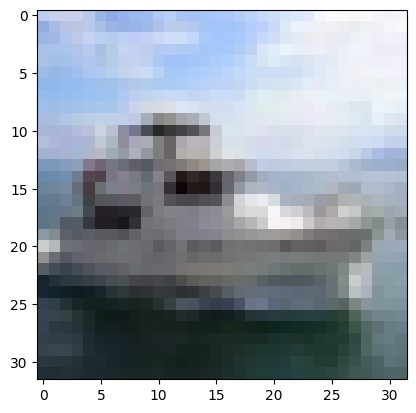

In [ ]:
import matplotlib.pyplot as plt

# Select an image index (e.g., 0 for the first image)
image_index = 1

# Reshape the image to 32x32x3 (width, height, color channels)
image = X_train[39999].reshape(32, 32, 3)

plt.imshow(image)
plt.show()

In [10]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


num_classes = 10
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 12ms/step - loss: 2.0457 - accuracy: 0.2637 - val_loss: 1.9472 - val_accuracy: 0.2843
Epoch 2/50
313/313 [==============================] - 4s 14ms/step - loss: 1.8738 - accuracy: 0.3356 - val_loss: 1.8313 - val_accuracy: 0.3471
Epoch 3/50
313/313 [==============================] - 3s 11ms/step - loss: 1.8112 - accuracy: 0.3611 - val_loss: 1.7883 - val_accuracy: 0.3646
Epoch 4/50
313/313 [==============================] - 3s 11ms/step - loss: 1.7634 - accuracy: 0.3794 - val_loss: 1.7517 - val_accuracy: 0.3744
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 1.7292 - accuracy: 0.3919 - val_loss: 1.7355 - val_accuracy: 0.3788
Epoch 6/50
313/313 [==============================] - 4s 11ms/step - loss: 1.6999 - accuracy: 0.4018 - val_loss: 1.7270 - val_accuracy: 0.3796
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 1.6752 - accuracy: 0.4082 - val_loss: 1.6726 - val_accuracy: 0.4072

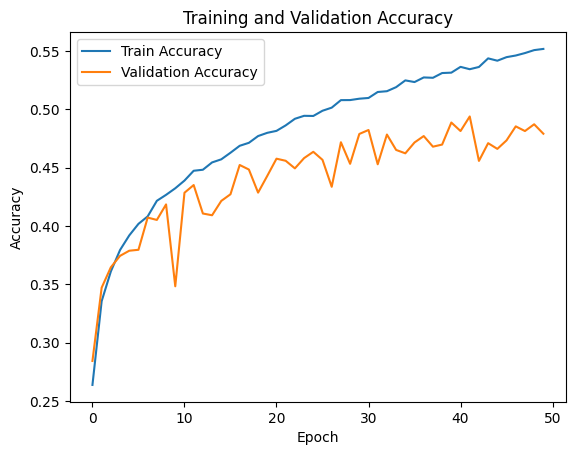

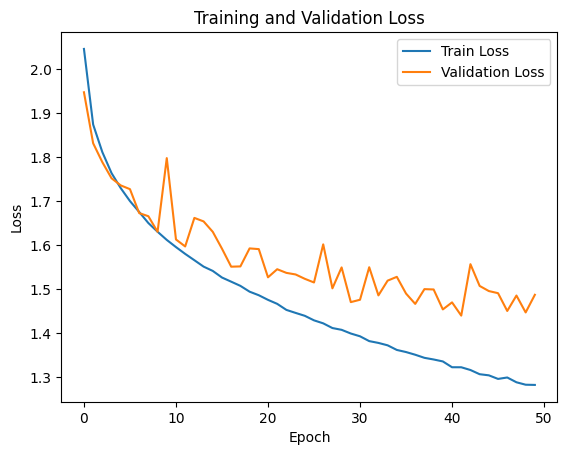

In [ ]:
# Train the model using Mini-batch SGD
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.regularizers import l2
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/50
313/313 [==============================] - 6s 15ms/step - loss: 2.7997 - accuracy: 0.2754 - val_loss: 2.6429 - val_accuracy: 0.3244
Epoch 2/50
313/313 [==============================] - 3s 11ms/step - loss: 2.5589 - accuracy: 0.3430 - val_loss: 2.4948 - val_accuracy: 0.3366
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 2.4237 - accuracy: 0.3660 - val_loss: 2.3780 - val_accuracy: 0.3634
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 2.3135 - accuracy: 0.3855 - val_loss: 2.3259 - val_accuracy: 0.3528
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 2.2244 - accuracy: 0.3934 - val_loss: 2.2145 - val_accuracy: 0.3776
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 2.1442 - accuracy: 0.4055 - val_loss: 2.1074 - val_accuracy: 0.4013
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 2.0767 - accuracy: 0.4124 - val_loss: 2.0547 - val_accuracy: 0.4024


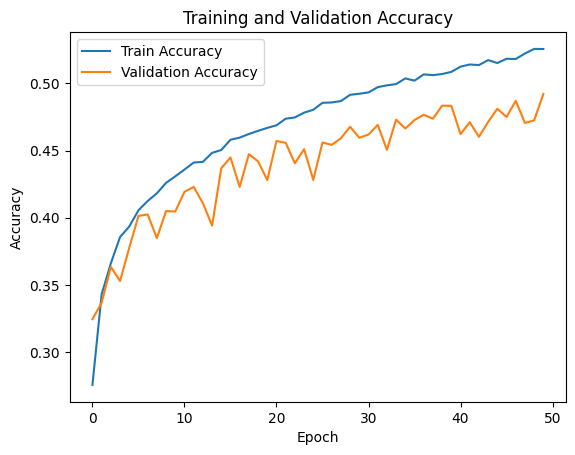

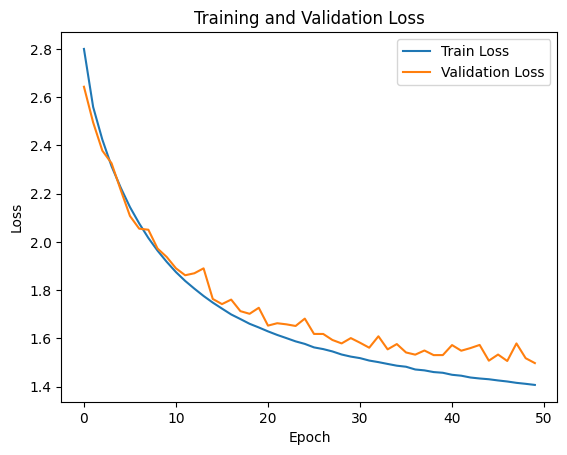

In [ ]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.layers import Dropout

In [14]:
dropout_rate=0.2
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 11ms/step - loss: 2.9077 - accuracy: 0.2237 - val_loss: 2.7126 - val_accuracy: 0.3043
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 2.6455 - accuracy: 0.3054 - val_loss: 2.5582 - val_accuracy: 0.3269
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 2.4948 - accuracy: 0.3367 - val_loss: 2.4030 - val_accuracy: 0.3564
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 2.3806 - accuracy: 0.3547 - val_loss: 2.3026 - val_accuracy: 0.3668
Epoch 5/50
313/313 [==============================] - 3s 11ms/step - loss: 2.2868 - accuracy: 0.3686 - val_loss: 2.2265 - val_accuracy: 0.3686
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 2.2086 - accuracy: 0.3758 - val_loss: 2.1471 - val_accuracy: 0.3898
Epoch 7/50
313/313 [==============================] - 3s 11ms/step - loss: 2.1380 - accuracy: 0.3838 - val_loss: 2.0864 - val_accuracy: 0.3939

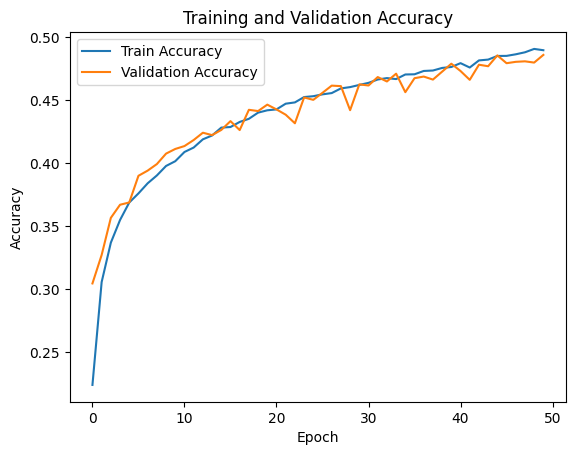

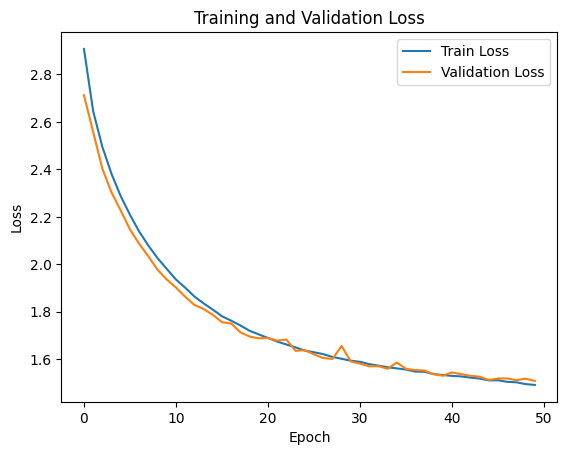

In [ ]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
dropout_rate=0.3
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 11ms/step - loss: 2.9255 - accuracy: 0.2272 - val_loss: 2.7429 - val_accuracy: 0.2957
Epoch 2/50
313/313 [==============================] - 4s 14ms/step - loss: 2.6783 - accuracy: 0.2920 - val_loss: 2.5601 - val_accuracy: 0.3291
Epoch 3/50
313/313 [==============================] - 6s 19ms/step - loss: 2.5364 - accuracy: 0.3178 - val_loss: 2.4383 - val_accuracy: 0.3438
Epoch 4/50
313/313 [==============================] - 6s 18ms/step - loss: 2.4192 - accuracy: 0.3419 - val_loss: 2.3418 - val_accuracy: 0.3523
Epoch 5/50
313/313 [==============================] - 8s 24ms/step - loss: 2.3213 - accuracy: 0.3530 - val_loss: 2.2515 - val_accuracy: 0.3695
Epoch 6/50
313/313 [==============================] - 6s 20ms/step - loss: 2.2417 - accuracy: 0.3611 - val_loss: 2.1683 - val_accuracy: 0.3823
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 2.1748 - accuracy: 0.3686 - val_loss: 2.0976 - val_accuracy: 0.3841

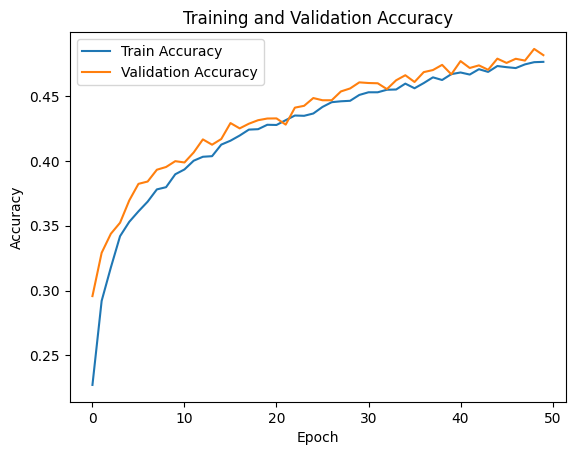

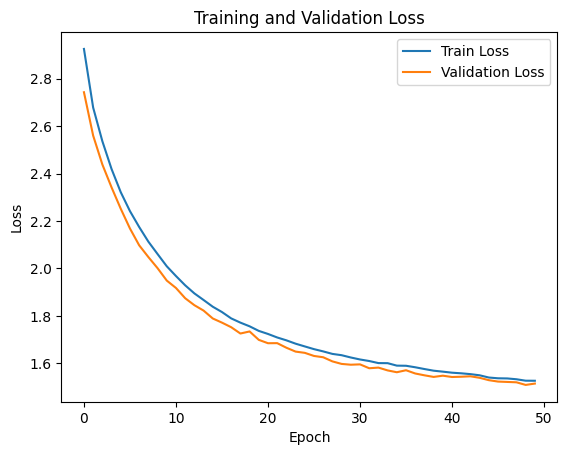

In [ ]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
dropout_rate=0.5
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 12ms/step - loss: 2.9961 - accuracy: 0.1863 - val_loss: 2.8023 - val_accuracy: 0.2831
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 2.7695 - accuracy: 0.2445 - val_loss: 2.6253 - val_accuracy: 0.3074
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 2.6166 - accuracy: 0.2822 - val_loss: 2.4853 - val_accuracy: 0.3334
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 2.5028 - accuracy: 0.3011 - val_loss: 2.3857 - val_accuracy: 0.3459
Epoch 5/50
313/313 [==============================] - 3s 11ms/step - loss: 2.4045 - accuracy: 0.3168 - val_loss: 2.3028 - val_accuracy: 0.3593
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 2.3230 - accuracy: 0.3289 - val_loss: 2.2133 - val_accuracy: 0.3679
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 2.2489 - accuracy: 0.3398 - val_loss: 2.1564 - val_accuracy: 0.3725

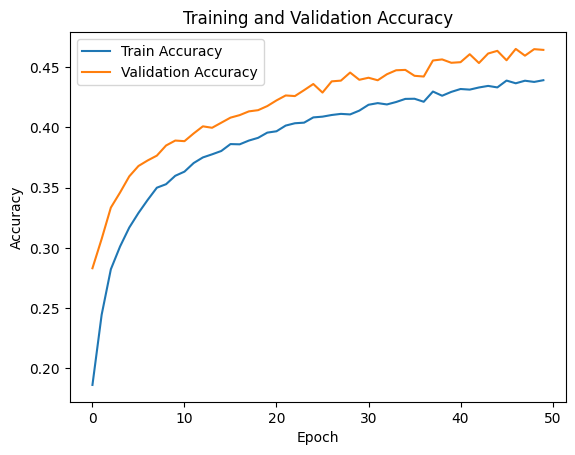

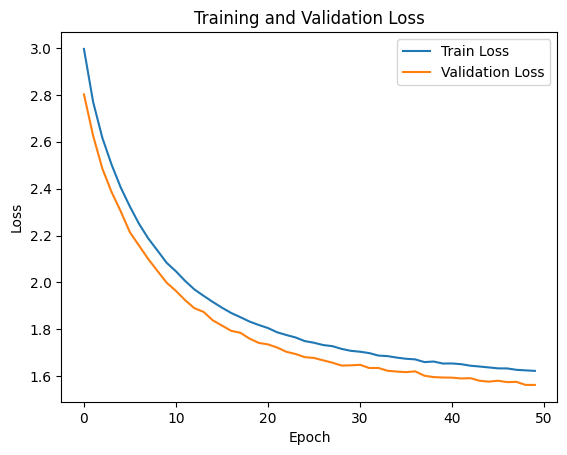

In [ ]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
###Qst 7 drop_rate=0.5
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")

Epoch 1/50
313/313 [==============================] - 5s 13ms/step - loss: 1.6185 - accuracy: 0.4354 - val_loss: 1.5640 - val_accuracy: 0.4612
Epoch 2/50
313/313 [==============================] - 3s 11ms/step - loss: 1.6178 - accuracy: 0.4395 - val_loss: 1.5629 - val_accuracy: 0.4601
Epoch 3/50
313/313 [==============================] - 4s 14ms/step - loss: 1.6166 - accuracy: 0.4392 - val_loss: 1.5561 - val_accuracy: 0.4632
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 1.6133 - accuracy: 0.4389 - val_loss: 1.5587 - val_accuracy: 0.4628
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 1.6039 - accuracy: 0.4428 - val_loss: 1.5587 - val_accuracy: 0.4609
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 1.6083 - accuracy: 0.4433 - val_loss: 1.5502 - val_accuracy: 0.4636
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 1.6045 - accuracy: 0.4440 - val_loss: 1.5436 - val_accuracy: 0.4699

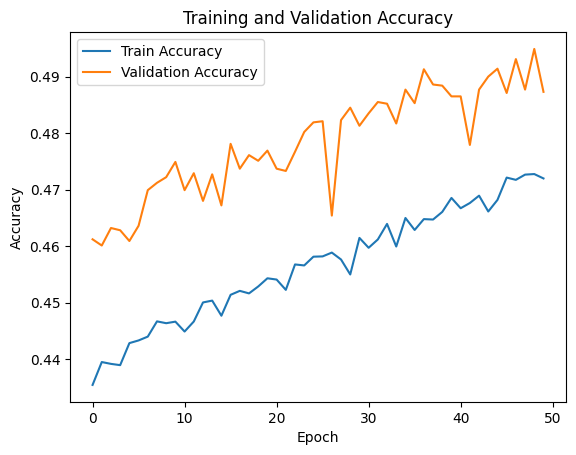

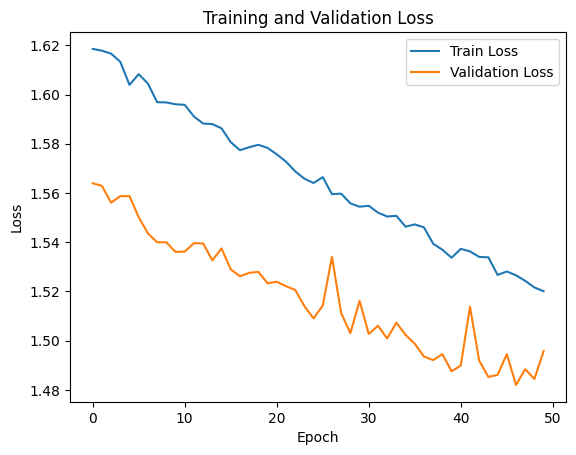

In [21]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
##Qst 7 drop_rate=0.2 with l2
dropout_rate=0.2
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")


Epoch 1/50
313/313 [==============================] - 5s 13ms/step - loss: 2.9398 - accuracy: 0.2093 - val_loss: 2.7458 - val_accuracy: 0.2812
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 2.6798 - accuracy: 0.2926 - val_loss: 2.5641 - val_accuracy: 0.3228
Epoch 3/50
313/313 [==============================] - 5s 14ms/step - loss: 2.5284 - accuracy: 0.3238 - val_loss: 2.4312 - val_accuracy: 0.3541
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 2.4136 - accuracy: 0.3395 - val_loss: 2.3487 - val_accuracy: 0.3536
Epoch 5/50
313/313 [==============================] - 5s 15ms/step - loss: 2.3173 - accuracy: 0.3551 - val_loss: 2.2479 - val_accuracy: 0.3753
Epoch 6/50
313/313 [==============================] - 5s 17ms/step - loss: 2.2360 - accuracy: 0.3667 - val_loss: 2.1723 - val_accuracy: 0.3832
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 2.1646 - accuracy: 0.3727 - val_loss: 2.1127 - val_accuracy: 0.3907

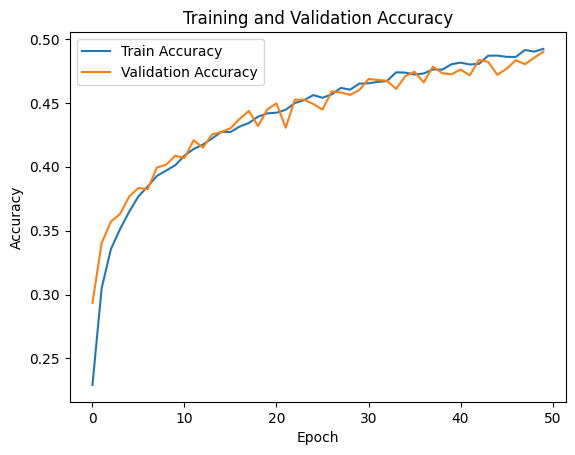

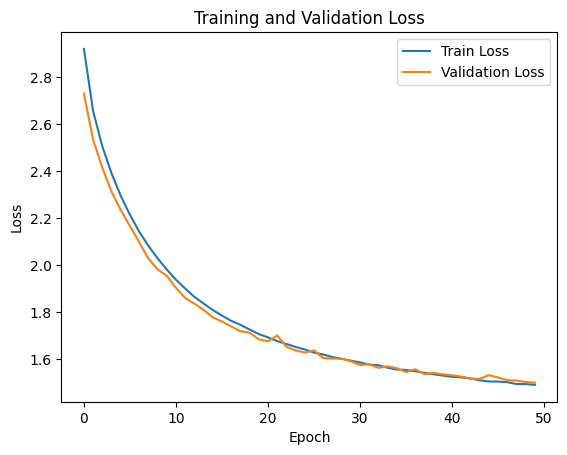

In [46]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
##Qst 7 drop_rate=0.3 with l2
dropout_rate=0.3
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")

Epoch 1/50
313/313 [==============================] - 72s 13ms/step - loss: 2.9428 - accuracy: 0.2176 - val_loss: 2.7558 - val_accuracy: 0.2934
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 2.6905 - accuracy: 0.2896 - val_loss: 2.5695 - val_accuracy: 0.3277
Epoch 3/50
313/313 [==============================] - 3s 11ms/step - loss: 2.5426 - accuracy: 0.3189 - val_loss: 2.4419 - val_accuracy: 0.3568
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 2.4286 - accuracy: 0.3382 - val_loss: 2.3416 - val_accuracy: 0.3644
Epoch 5/50
313/313 [==============================] - 3s 11ms/step - loss: 2.3357 - accuracy: 0.3512 - val_loss: 2.2567 - val_accuracy: 0.3626
Epoch 6/50
313/313 [==============================] - 5s 14ms/step - loss: 2.2523 - accuracy: 0.3599 - val_loss: 2.1844 - val_accuracy: 0.3762
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 2.1848 - accuracy: 0.3691 - val_loss: 2.1250 - val_accuracy: 0.378

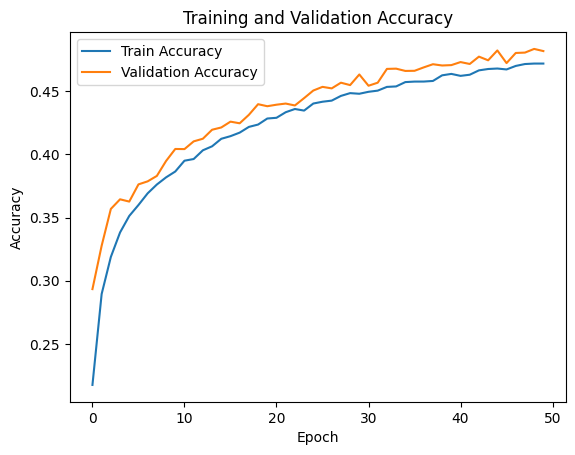

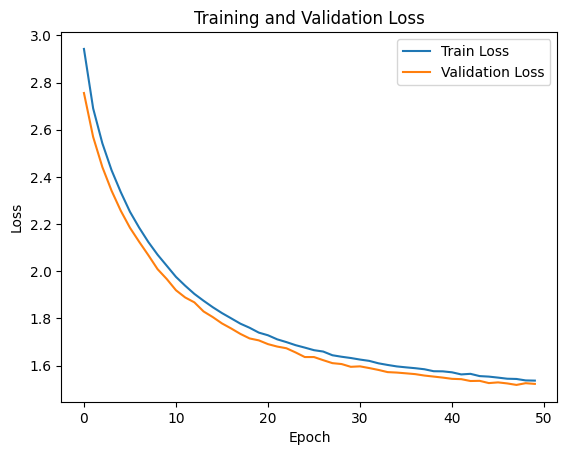

In [50]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
##Qst 7 drop_rate=0.5 with l2
dropout_rate=0.5
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")

Epoch 1/50
313/313 [==============================] - 8s 20ms/step - loss: 2.9764 - accuracy: 0.1976 - val_loss: 2.7764 - val_accuracy: 0.2690
Epoch 2/50
313/313 [==============================] - 5s 16ms/step - loss: 2.7332 - accuracy: 0.2623 - val_loss: 2.5905 - val_accuracy: 0.3137
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 2.5899 - accuracy: 0.2863 - val_loss: 2.4693 - val_accuracy: 0.3314
Epoch 4/50
313/313 [==============================] - 5s 15ms/step - loss: 2.4766 - accuracy: 0.3085 - val_loss: 2.3619 - val_accuracy: 0.3488
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 2.3835 - accuracy: 0.3213 - val_loss: 2.2726 - val_accuracy: 0.3641
Epoch 6/50
313/313 [==============================] - 3s 11ms/step - loss: 2.3032 - accuracy: 0.3340 - val_loss: 2.1959 - val_accuracy: 0.3685
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 2.2327 - accuracy: 0.3401 - val_loss: 2.1420 - val_accuracy: 0.3714

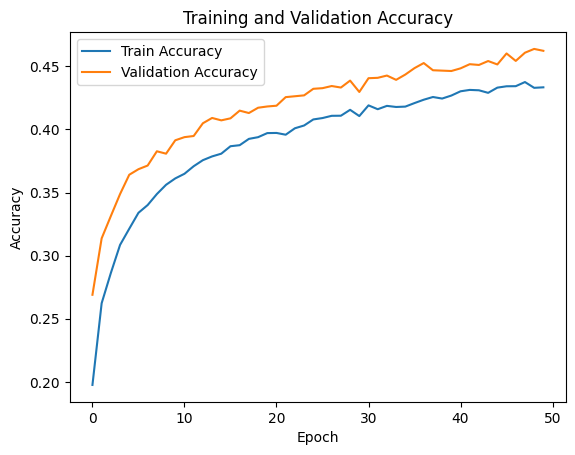

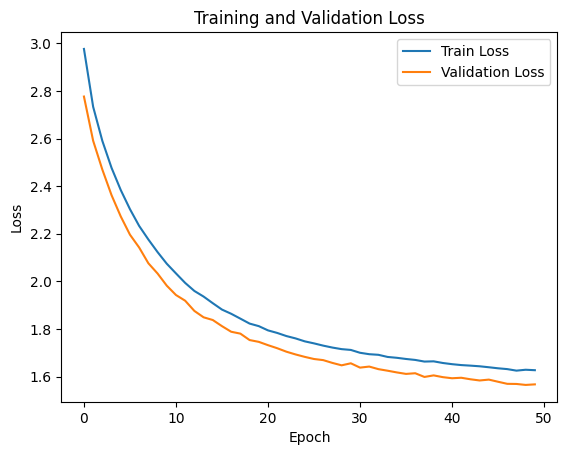

In [19]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**it was useless no early stopping for all of them xD**

In [51]:
##Qst 8 drpout_rate = 0.2 stopped at 44
from tensorflow.keras.layers import BatchNormalization
dropout_rate=0.2
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  BatchNormalization(),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")

Epoch 1/50
313/313 [==============================] - 6s 17ms/step - loss: 2.7977 - accuracy: 0.2964 - val_loss: 2.6130 - val_accuracy: 0.3439
Epoch 2/50
313/313 [==============================] - 5s 17ms/step - loss: 2.5058 - accuracy: 0.3659 - val_loss: 2.4329 - val_accuracy: 0.3765
Epoch 3/50
313/313 [==============================] - 8s 26ms/step - loss: 2.3530 - accuracy: 0.3930 - val_loss: 2.2913 - val_accuracy: 0.3984
Epoch 4/50
313/313 [==============================] - 3s 11ms/step - loss: 2.2363 - accuracy: 0.4113 - val_loss: 2.1792 - val_accuracy: 0.4238
Epoch 5/50
313/313 [==============================] - 5s 15ms/step - loss: 2.1343 - accuracy: 0.4237 - val_loss: 2.1034 - val_accuracy: 0.4226
Epoch 6/50
313/313 [==============================] - 6s 21ms/step - loss: 2.0593 - accuracy: 0.4331 - val_loss: 2.0390 - val_accuracy: 0.4185
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 1.9856 - accuracy: 0.4412 - val_loss: 1.9761 - val_accuracy: 0.4326

**Qst 8 drpout_rate = 0.2 stopped at 44**

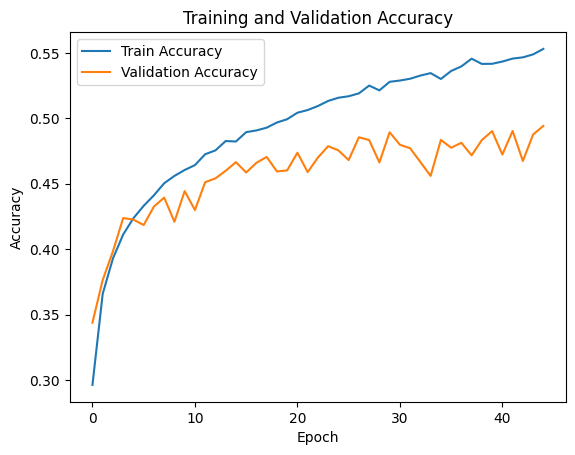

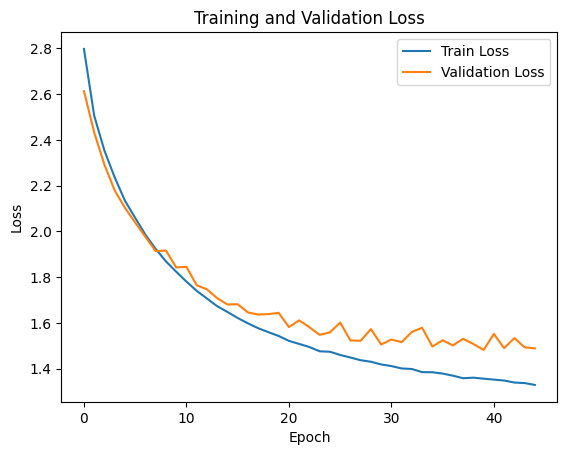

In [52]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [104]:
##Qst 8 drpout_rate = 0.3
from tensorflow.keras.layers import BatchNormalization
dropout_rate=0.3
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  BatchNormalization(),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")

Epoch 1/50
313/313 [==============================] - 6s 16ms/step - loss: 2.8087 - accuracy: 0.2795 - val_loss: 2.5882 - val_accuracy: 0.3465
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 2.5188 - accuracy: 0.3514 - val_loss: 2.4347 - val_accuracy: 0.3675
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 2.3732 - accuracy: 0.3776 - val_loss: 2.2922 - val_accuracy: 0.3936
Epoch 4/50
313/313 [==============================] - 4s 14ms/step - loss: 2.2585 - accuracy: 0.3932 - val_loss: 2.1912 - val_accuracy: 0.4101
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 2.1678 - accuracy: 0.4067 - val_loss: 2.1267 - val_accuracy: 0.4042
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 2.0937 - accuracy: 0.4150 - val_loss: 2.0517 - val_accuracy: 0.4137
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 2.0186 - accuracy: 0.4263 - val_loss: 1.9801 - val_accuracy: 0.4256

**Qst 8 drpout_rate = 0.3 stopped at 49 (it did so at 47 in a first run)**

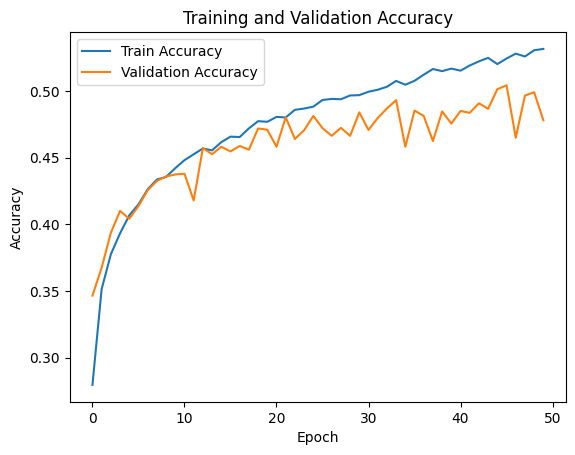

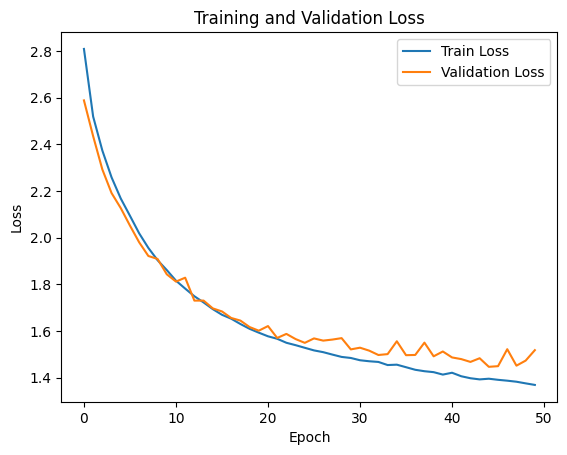

In [105]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [106]:
##Qst 8 drpout_rate = 0.5 stopped at 47
from tensorflow.keras.layers import BatchNormalization
dropout_rate=0.5
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  BatchNormalization(),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, callbacks=[early_stopping], validation_data=(X_val, y_val))
# Check if training stopped early
if early_stopping.stopped_epoch:
  print("Training stopped early at epoch:", early_stopping.stopped_epoch)
else:
  print("Training completed all epochs (no early stopping)")

Epoch 1/50
313/313 [==============================] - 6s 16ms/step - loss: 2.8859 - accuracy: 0.2603 - val_loss: 2.5832 - val_accuracy: 0.3495
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 2.5905 - accuracy: 0.3254 - val_loss: 2.4425 - val_accuracy: 0.3550
Epoch 3/50
313/313 [==============================] - 4s 11ms/step - loss: 2.4353 - accuracy: 0.3507 - val_loss: 2.3346 - val_accuracy: 0.3749
Epoch 4/50
313/313 [==============================] - 5s 15ms/step - loss: 2.3214 - accuracy: 0.3683 - val_loss: 2.2008 - val_accuracy: 0.4041
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 2.2299 - accuracy: 0.3723 - val_loss: 2.1180 - val_accuracy: 0.4120
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 2.1573 - accuracy: 0.3873 - val_loss: 2.0569 - val_accuracy: 0.4180
Epoch 7/50
313/313 [==============================] - 5s 15ms/step - loss: 2.0937 - accuracy: 0.3888 - val_loss: 1.9902 - val_accuracy: 0.4240

 **Qst 8 drpout_rate = 0.5 didn't stop**

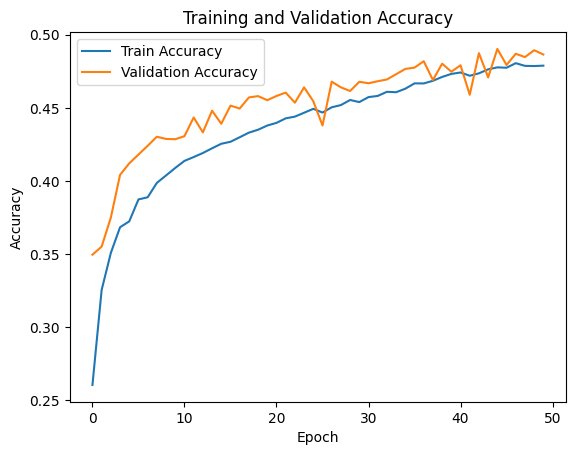

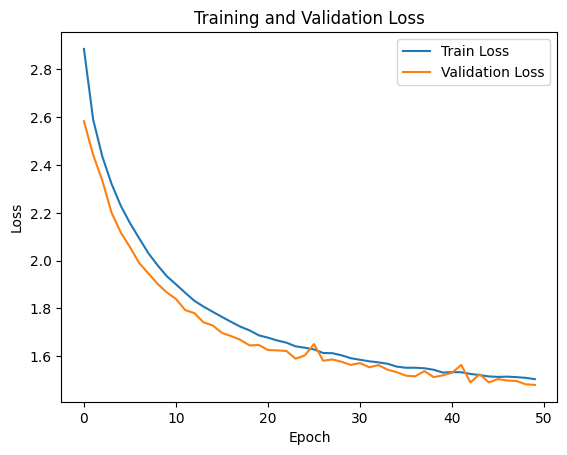

In [107]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(num_classes, activation='softmax')
    ])
model.compile(optimizer=SGD(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [99]:
best_score = []
best_params = {}
possible_learning_rates = np.array([0.01, 0.001, 0.0001, 0.00001])
possible_dropout_rates = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
possible_batch_size = np.array([32, 64, 128])
for i in range(50):
    # Sample learning rate from the list
    learning_rate = np.random.choice(possible_learning_rates)
    dropout_rate = np.random.choice(possible_dropout_rates)
    batch_size = np.random.choice(possible_batch_size)

    # Assign hyperparameters to model (replace placeholder with model-specific assignment)
    model.learning_rate = learning_rate
    model.dropout_rate = dropout_rate
    model.batch_size = batch_size

    # Train and evaluate model
    model.fit(X_train, y_train)
    current_score = model.evaluate(X_val, y_val)

    if current_score > best_score:
        best_score = current_score
best_params = {'learning_rate': learning_rate, 'dropout_rate': dropout_rate, 'batch_size': batch_size}
print(best_params)

313/313 [==============================] - 1s 4ms/step - loss: 1.5029 - accuracy: 0.4789
{'learning_rate': 0.0001, 'dropout_rate': 0.2, 'batch_size': 128}


# **learning_rate': 0.0001, 'dropout_rate': 0.2, 'batch_size': 128**